- Define one simple unbalanced classification tasks and solve it with Decision Tree or KNN. 
- If the dataset is already unbalanced leave it as it is, otherwise turns the dataset into an imbalanced version (e.g., 96% - 4%, for binary classification).
- Then solve the classification task using the Decision Tree or KNN by adopting at least 2 techniques of imbalanced learning (Undersampling, Oversampling).

In [1]:
from sklearn.model_selection import train_test_split, cross_val_score 

from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import scale
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import RobustScaler
from sklearn.preprocessing import StandardScaler

from sklearn.metrics import accuracy_score, f1_score, classification_report
from sklearn.metrics import roc_curve, auc, roc_auc_score

In [2]:
df_test = pd.read_csv("/content/Test_ripulito")
df_train = pd.read_csv("/content/Train_ripulito")

In [3]:
df_test = df_test.drop(columns=['Unnamed: 0'])
df_train = df_train.drop(columns=['Unnamed: 0'])

In [4]:
df_train_copy = df_train
df_test_copy = df_test

In [5]:
t_train = df_train.drop(columns=['vocal_channel', 'emotion', 'emotional_intensity', 'statement', 'repetition', 'sex', 'filename'])

In [6]:
t_test = df_test.drop(columns=['vocal_channel', 'emotion', 'emotional_intensity', 'statement', 'repetition', 'sex', 'filename'])

In [7]:
columns_train = []
columns_train = t_train.columns

In [8]:
columns_test = []
columns_test = t_test.columns

In [9]:
columns_train

Index(['sum', 'std', 'q25', 'q50', 'q75', 'kur', 'skew', 'lag1_sum',
       'lag1_q25', 'lag1_q50',
       ...
       'sc_max_w4', 'sc_q25_w4', 'sc_kur_w4', 'sc_skew_w4', 'stft_sum_w4',
       'stft_mean_w4', 'stft_std_w4', 'stft_min_w4', 'stft_kur_w4',
       'stft_skew_w4'],
      dtype='object', length=242)

In [10]:
scaler = StandardScaler()
x_train_norm = scaler.fit_transform(t_train)
#print(x_train_norm)
x_test_norm = scaler.transform(t_test)
#print(x_test_norm)

In [11]:
df_trainNORM = pd.DataFrame(x_train_norm, columns = columns_train)
df_testNORM = pd.DataFrame(x_test_norm, columns = columns_test)

In [12]:
"""df_trainNORM = df_trainNORM.assign(vocal_channel = df_train_copy['vocal_channel'].values)
df_trainNORM = df_trainNORM.assign(emotion = df_train_copy['emotion'].values)
df_trainNORM = df_trainNORM.assign(statement = df_train_copy['statement'].values)
df_trainNORM = df_trainNORM.assign(repetition = df_train_copy['repetition'].values)
df_trainNORM = df_trainNORM.assign(sex = df_train_copy['sex'].values)
df_trainNORM = df_trainNORM.assign(filename = df_train_copy['filename'].values)"""
df_trainNORM = df_trainNORM.assign(emotional_intensity = df_train_copy['emotional_intensity'].values)

In [13]:
#df_trainNORM

In [14]:
"""df_testNORM = df_testNORM.assign(vocal_channel = df_test_copy['vocal_channel'].values)
df_testNORM = df_testNORM.assign(emotion = df_test_copy['emotion'].values)
df_testNORM = df_testNORM.assign(statement = df_test_copy['statement'].values)
df_testNORM = df_testNORM.assign(repetition = df_test_copy['repetition'].values)
df_testNORM = df_testNORM.assign(sex = df_test_copy['sex'].values)
df_testNORM = df_testNORM.assign(filename = df_test_copy['filename'].values)"""
df_testNORM = df_testNORM.assign(emotional_intensity = df_test_copy['emotional_intensity'].values)

In [15]:
#df_testNORM

sbilanciamento emotional_intensity sul train set

In [16]:
from sklearn import preprocessing
label_encoder = preprocessing.LabelEncoder()
df_trainNORM['emotional_intensity']= label_encoder.fit_transform(df_trainNORM['emotional_intensity']) 
df_testNORM['emotional_intensity'] = label_encoder.transform(df_testNORM['emotional_intensity'])


In [17]:
#classe da sbilanciare
class_name = 'emotional_intensity'

In [18]:
#sbilanciamento train
attributes = [col for col in df_trainNORM.columns if col != class_name]
X = df_trainNORM[attributes].values
y = df_trainNORM[class_name]

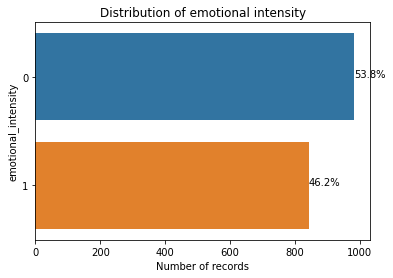

In [19]:
ax = sns.countplot(y="emotional_intensity", data=df_trainNORM)
plt.title('Distribution of emotional intensity')
plt.xlabel('Number of records')
total = len(df_trainNORM['emotional_intensity'])
for p in ax.patches:
        percentage = '{:.1f}%'.format(100 * p.get_width()/total)
        x = p.get_x() + p.get_width() + 0.02
        y = p.get_y() + p.get_height()/2
        ax.annotate(percentage, (x, y))

plt.show()

In [20]:
df_trainNORM['emotional_intensity'].value_counts() 
#0 = normal
#1 = strong

0    984
1    844
Name: emotional_intensity, dtype: int64

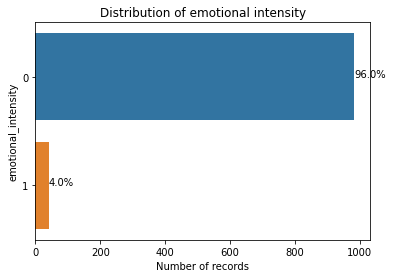

In [21]:
from imblearn.datasets import make_imbalance
seed = 100
attributes = [col for col in df_trainNORM.columns if col != class_name]
X = df_trainNORM[attributes]
y = df_trainNORM[class_name]
#sbilanciamento 96% e 4%
X_res, y_res = make_imbalance(X, y, sampling_strategy={0: 984, 1: 41}, random_state=seed)

dxres = pd.DataFrame(X_res)
dyres = pd.DataFrame(y_res)

df2_train_sbil=pd.concat([dxres, dyres], axis=1, join="inner")
#attr= [col for col in df_trainNORM.columns]
#df2.columns = attr
ax = sns.countplot(y="emotional_intensity", data=df2_train_sbil)
plt.title('Distribution of emotional intensity')
plt.xlabel('Number of records')
total = len(df2_train_sbil['emotional_intensity'])
for p in ax.patches:
        percentage = '{:.1f}%'.format(100 * p.get_width()/total)
        x = p.get_x() + p.get_width() + 0.02
        y = p.get_y() + p.get_height()/2
        ax.annotate(percentage, (x, y))

plt.show()

In [22]:
#df2_train

sbilanciamento emotional_intensity sul Test Set

In [23]:
#sbilanciamento test
attributes2 = [col for col in df_testNORM.columns if col != class_name]
X = df_testNORM[attributes2].values
y = df_testNORM[class_name]

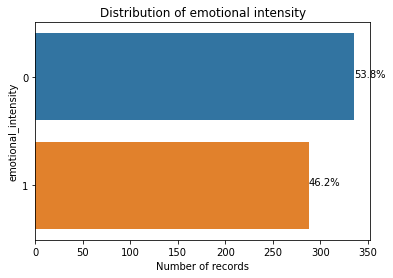

In [24]:
ax = sns.countplot(y="emotional_intensity", data=df_testNORM)
plt.title('Distribution of emotional intensity')
plt.xlabel('Number of records')
total = len(df_testNORM['emotional_intensity'])
for p in ax.patches:
        percentage = '{:.1f}%'.format(100 * p.get_width()/total)
        x = p.get_x() + p.get_width() + 0.02
        y = p.get_y() + p.get_height()/2
        ax.annotate(percentage, (x, y))

plt.show()

In [25]:
df_testNORM['emotional_intensity'].value_counts()

0    336
1    288
Name: emotional_intensity, dtype: int64

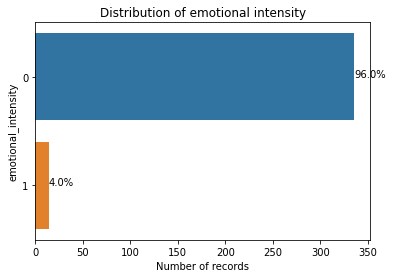

In [26]:
from imblearn.datasets import make_imbalance
seed = 100
attributes = [col for col in df_testNORM.columns if col != class_name]
X = df_testNORM[attributes]
y = df_testNORM[class_name]
#sbilanciamento 96% e 4%
X_res, y_res = make_imbalance(X, y, sampling_strategy={0: 336, 1: 14}, random_state=seed)

dxres = pd.DataFrame(X_res)
dyres = pd.DataFrame(y_res)

df2_test_sbil=pd.concat([dxres, dyres], axis=1, join="inner")
#attr= [col for col in df_trainNORM.columns]
#df2.columns = attr
ax = sns.countplot(y="emotional_intensity", data=df2_test_sbil)
plt.title('Distribution of emotional intensity')
plt.xlabel('Number of records')
total = len(df2_test_sbil['emotional_intensity'])
for p in ax.patches:
        percentage = '{:.1f}%'.format(100 * p.get_width()/total)
        x = p.get_x() + p.get_width() + 0.02
        y = p.get_y() + p.get_height()/2
        ax.annotate(percentage, (x, y))

plt.show()

In [27]:
#df2_test_sbil

In [29]:
#!pip install scikit-plot
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split, cross_val_score 
from scikitplot.metrics import plot_precision_recall, plot_roc, plot_cumulative_gain, plot_lift_curve
from sklearn.metrics import roc_curve, auc, roc_auc_score
from scikitplot.metrics import plot_roc_curve
from sklearn.model_selection import KFold, StratifiedKFold,RepeatedStratifiedKFold, cross_val_score, KFold, RandomizedSearchCV,GridSearchCV, RepeatedKFold
from sklearn import tree
from sklearn.metrics import accuracy_score, precision_score, recall_score, confusion_matrix, f1_score, classification_report

In [30]:
X_train = df2_train_sbil.drop(columns = ['emotional_intensity'])
y_train = df2_train_sbil[['emotional_intensity']]
X_test = df2_test_sbil.drop(columns = ['emotional_intensity'])
y_test = df2_test_sbil[['emotional_intensity']]


In [31]:
# Funzione per fare la GridSearch()

def customGridSearch(X_train, y_train, model, tuned_parameters,score):

    print("____________________________________________ START GRID SEARCH ____________________________________________")

    results = {}
    
    print("------- Score = " + score +  "------- \n")
        
    k_fold = RepeatedStratifiedKFold() # 5 split default, 10 repetitions default
    print("> Fold = " + str(k_fold) + "\n")
        
    clf = GridSearchCV(model, tuned_parameters, error_score='raise', cv=k_fold, scoring = score, return_train_score=True)
    clf.fit(X_train, y_train)

    print("> Best Parameter set: \n")
    best = clf.best_params_
    print(best)
        
    print("\n> Grid scores:\n")

    means = clf.cv_results_['mean_train_score']
    stds = clf.cv_results_['std_train_score']

    print("...........RESULTS FOR TRAINING.........")
    print("........................................")

   
    
    for mean, std, params in zip(means, stds, clf.cv_results_['params']):
        print("%0.3f (+/-%0.03f) for %r" % (mean, std * 2, params))
                          
    print("____________________________________________ END GRID SEARCH ____________________________________________")
        
    results[score] = best
    
    return results

Prove con sbilanciamento su dataset normalizzati

In [32]:
from sklearn.dummy import DummyClassifier

In [33]:
clf = DummyClassifier()
clf.fit(X_train, y_train)

y_pred0 = clf.predict(X_test)

print('Accuracy %s' % accuracy_score(y_test, y_pred0))
print('F1-score %s' % f1_score(y_test, y_pred0, average=None))
print(classification_report(y_test, y_pred0))

Accuracy 0.96
F1-score [0.97959184 0.        ]
              precision    recall  f1-score   support

           0       0.96      1.00      0.98       336
           1       0.00      0.00      0.00        14

    accuracy                           0.96       350
   macro avg       0.48      0.50      0.49       350
weighted avg       0.92      0.96      0.94       350



/usr/local/lib/python3.9/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.9/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.9/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


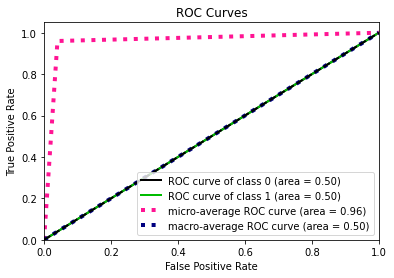

In [35]:
y_score = clf.predict_proba(X_test)
plot_roc(y_test, y_score)
plt.show()

In [36]:
from sklearn.tree import DecisionTreeClassifier

In [ ]:
"""check_params ={"criterion":["gini", "entropy"],
         "max_depth":[4, 6, 8, 10],
         "min_samples_split": [5, 10, 15, 20],
         "min_samples_leaf": [3, 5, 7, 9, 11]}

dt=DecisionTreeClassifier()
          
results = customGridSearch(X_train, y_train, dt, check_params, "f1_macro")"""


____________________________________________ START GRID SEARCH ____________________________________________
------- Score = f1_macro------- 

> Fold = RepeatedStratifiedKFold(n_repeats=10, n_splits=5, random_state=None)

> Best Parameter set: 

{'criterion': 'entropy', 'max_depth': 6, 'min_samples_leaf': 5, 'min_samples_split': 5}

> Grid scores:

...........RESULTS FOR TRAINING.........
........................................
0.750 (+/-0.058) for {'criterion': 'gini', 'max_depth': 4, 'min_samples_leaf': 3, 'min_samples_split': 5}
0.716 (+/-0.095) for {'criterion': 'gini', 'max_depth': 4, 'min_samples_leaf': 3, 'min_samples_split': 10}
0.689 (+/-0.101) for {'criterion': 'gini', 'max_depth': 4, 'min_samples_leaf': 3, 'min_samples_split': 15}
0.661 (+/-0.116) for {'criterion': 'gini', 'max_depth': 4, 'min_samples_leaf': 3, 'min_samples_split': 20}
0.692 (+/-0.102) for {'criterion': 'gini', 'max_depth': 4, 'min_samples_leaf': 5, 'min_samples_split': 5}
0.696 (+/-0.102) for {'criterion': 

In [ ]:
#results

{'f1_macro': {'criterion': 'entropy',
  'max_depth': 6,
  'min_samples_leaf': 5,
  'min_samples_split': 5}}

In [37]:
clf = DecisionTreeClassifier(criterion = 'entropy', max_depth = 6, min_samples_split=5, min_samples_leaf=5, random_state=42)
clf.fit(X_train, y_train)

y_pred0 = clf.predict(X_test)

print('Accuracy %s' % accuracy_score(y_test, y_pred0))
print('F1-score %s' % f1_score(y_test, y_pred0, average=None))
print(classification_report(y_test, y_pred0))

Accuracy 0.9114285714285715
F1-score [0.95267176 0.31111111]
              precision    recall  f1-score   support

           0       0.98      0.93      0.95       336
           1       0.23      0.50      0.31        14

    accuracy                           0.91       350
   macro avg       0.60      0.71      0.63       350
weighted avg       0.95      0.91      0.93       350



In [38]:
#ROC CURVE
y_score = clf.predict_proba(X_test)
fpr0, tpr0, _ = roc_curve(y_test, y_score[:, 1])
roc_auc0 = auc(fpr0, tpr0)

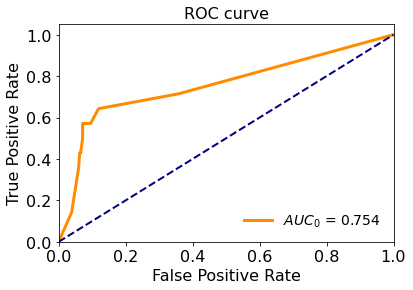

In [39]:
plt.plot(fpr0, tpr0, color='darkorange', lw=3, label='$AUC_0$ = %.3f' % (roc_auc0))

plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate', fontsize=16)
plt.ylabel('True Positive Rate', fontsize=16)
plt.title('ROC curve', fontsize=16)
plt.legend(loc="lower right", fontsize=14, frameon=False)
plt.tick_params(axis='both', which='major', labelsize=16)
plt.show()
#roc curve con decision tree allenato sui dati non bilanciati

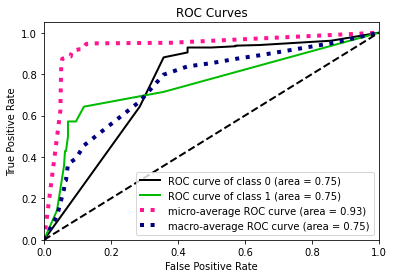

In [40]:
y_score = clf.predict_proba(X_test)
plot_roc(y_test, y_score)
plt.show()

Accuracy 0.9285714285714286
F1-score [0.96274218 0.13793103]
              precision    recall  f1-score   support

           0       0.96      0.96      0.96       336
           1       0.13      0.14      0.14        14

    accuracy                           0.93       350
   macro avg       0.55      0.55      0.55       350
weighted avg       0.93      0.93      0.93       350



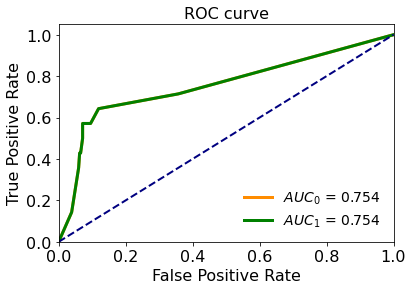

In [41]:
#DECISION TREE
clf = DecisionTreeClassifier(criterion = 'entropy', max_depth = 6, min_samples_split=5, min_samples_leaf=5, random_state=42)
clf.fit(X_train, y_train)

def adjusted_predict(X, thr=0.5):
    y_score = clf.predict_proba(X_test)[:, 1]
    return np.array([1 if y > thr else 0 for y in y_score])

y_pred = adjusted_predict(X_test, thr=0.9)

print('Accuracy %s' % accuracy_score(y_test, y_pred))
print('F1-score %s' % f1_score(y_test, y_pred, average=None))
print(classification_report(y_test, y_pred))

y_score = clf.predict_proba(X_test)
fpr, tpr, thr = roc_curve(y_test, y_score[:, 1])
roc_auc = auc(fpr, tpr)

plt.plot(fpr0, tpr0, color='darkorange', lw=3, label='$AUC_0$ = %.3f' % (roc_auc0))
plt.plot(fpr, tpr, color='green', lw=3, label='$AUC_1$ = %.3f' % (roc_auc))

plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate', fontsize=16)
plt.ylabel('True Positive Rate', fontsize=16)
plt.title('ROC curve', fontsize=16)
plt.legend(loc="lower right", fontsize=14, frameon=False)
plt.tick_params(axis='both', which='major', labelsize=16)
plt.show()

In [42]:
#PCA
from sklearn.decomposition import PCA


In [43]:
X_train.shape

(1025, 242)

In [44]:
pca = PCA(n_components=2)
pca.fit(X_train)
X_pca = pca.transform(X_train)

In [45]:
X_pca.shape

(1025, 2)

In [46]:
np.unique(y_train, return_counts=True), np.unique(y_test, return_counts=True)

((array([0, 1]), array([984,  41])), (array([0, 1]), array([336,  14])))

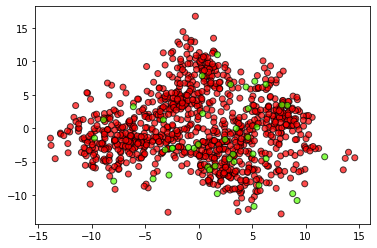

In [47]:
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=y_train['emotional_intensity'], cmap=plt.cm.prism, edgecolor='k', alpha=0.7)
plt.show()

UNDERSAMPLING


In [48]:
from imblearn.under_sampling import RandomUnderSampler
from imblearn.under_sampling import CondensedNearestNeighbour
from imblearn.under_sampling import TomekLinks
from imblearn.under_sampling import EditedNearestNeighbours
from collections import Counter
from collections import defaultdict

RandomUnderSampler

In [49]:
rus = RandomUnderSampler(random_state=42)
X_res, y_res = rus.fit_resample(X_train, y_train['emotional_intensity'])
print('Resampled dataset shape %s' % Counter(y_res))

Resampled dataset shape Counter({0: 41, 1: 41})


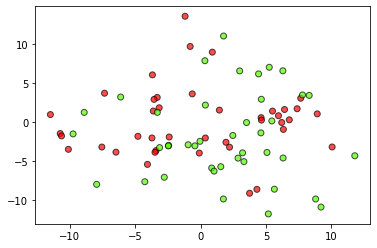

In [50]:
pca = PCA(n_components=2)
pca.fit(X_train)
X_pca = pca.transform(X_res)

plt.scatter(X_pca[:, 0], X_pca[:, 1], c=y_res, cmap=plt.cm.prism, edgecolor='k', alpha=0.7)
plt.show()

In [ ]:
"""check_params ={"criterion":["gini", "entropy"],
         "max_depth":[4, 6, 8, 10],
         "min_samples_split": [5, 10, 15, 20],
         "min_samples_leaf": [3, 5, 7, 9, 11]}

dt=DecisionTreeClassifier()
          
results = customGridSearch(X_res, y_res, dt, check_params, "f1_macro")"""


____________________________________________ START GRID SEARCH ____________________________________________
------- Score = f1_macro------- 

> Fold = RepeatedStratifiedKFold(n_repeats=10, n_splits=5, random_state=None)

> Best Parameter set: 

{'criterion': 'gini', 'max_depth': 6, 'min_samples_leaf': 5, 'min_samples_split': 5}

> Grid scores:

...........RESULTS FOR TRAINING.........
........................................
0.934 (+/-0.039) for {'criterion': 'gini', 'max_depth': 4, 'min_samples_leaf': 3, 'min_samples_split': 5}
0.922 (+/-0.045) for {'criterion': 'gini', 'max_depth': 4, 'min_samples_leaf': 3, 'min_samples_split': 10}
0.900 (+/-0.061) for {'criterion': 'gini', 'max_depth': 4, 'min_samples_leaf': 3, 'min_samples_split': 15}
0.890 (+/-0.062) for {'criterion': 'gini', 'max_depth': 4, 'min_samples_leaf': 3, 'min_samples_split': 20}
0.889 (+/-0.048) for {'criterion': 'gini', 'max_depth': 4, 'min_samples_leaf': 5, 'min_samples_split': 5}
0.889 (+/-0.046) for {'criterion': 'gi

In [ ]:
#results

{'f1_macro': {'criterion': 'gini',
  'max_depth': 6,
  'min_samples_leaf': 5,
  'min_samples_split': 5}}

Accuracy 0.5942857142857143
F1-score [0.73605948 0.12345679]
              precision    recall  f1-score   support

           0       0.98      0.59      0.74       336
           1       0.07      0.71      0.12        14

    accuracy                           0.59       350
   macro avg       0.52      0.65      0.43       350
weighted avg       0.94      0.59      0.71       350



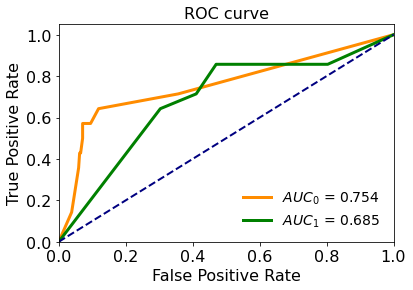

In [51]:
#DECISION TREE
clf = DecisionTreeClassifier(criterion =  'gini', max_depth = 6, min_samples_leaf = 5, min_samples_split = 5, random_state=42)
clf.fit(X_res, y_res)

y_pred = clf.predict(X_test)

print('Accuracy %s' % accuracy_score(y_test, y_pred))
print('F1-score %s' % f1_score(y_test, y_pred, average=None))
print(classification_report(y_test, y_pred))

y_score = clf.predict_proba(X_test)
fpr, tpr, _ = roc_curve(y_test, y_score[:, 1])
roc_auc = auc(fpr, tpr)

plt.plot(fpr0, tpr0, color='darkorange', lw=3, label='$AUC_0$ = %.3f' % (roc_auc0))
plt.plot(fpr, tpr, color='green', lw=3, label='$AUC_1$ = %.3f' % (roc_auc))

plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate', fontsize=16)
plt.ylabel('True Positive Rate', fontsize=16)
plt.title('ROC curve', fontsize=16)
plt.legend(loc="lower right", fontsize=14, frameon=False)
plt.tick_params(axis='both', which='major', labelsize=16)
plt.show()

In [ ]:
"""check_params = {'n_neighbors': [1, 5, 10, 15, 20], "weights":["distance", "uniform"], 'metric' :['minkowski', 'manhattan', 'euclidean']}

clf=KNeighborsClassifier()
          
results = customGridSearch(X_res, y_res, clf, check_params, "f1_macro")"""

____________________________________________ START GRID SEARCH ____________________________________________
------- Score = f1_macro------- 

> Fold = RepeatedStratifiedKFold(n_repeats=10, n_splits=5, random_state=None)

> Best Parameter set: 

{'metric': 'minkowski', 'n_neighbors': 1, 'weights': 'distance'}

> Grid scores:

...........RESULTS FOR TRAINING.........
........................................
1.000 (+/-0.000) for {'metric': 'minkowski', 'n_neighbors': 1, 'weights': 'distance'}
1.000 (+/-0.000) for {'metric': 'minkowski', 'n_neighbors': 1, 'weights': 'uniform'}
1.000 (+/-0.000) for {'metric': 'minkowski', 'n_neighbors': 5, 'weights': 'distance'}
0.741 (+/-0.066) for {'metric': 'minkowski', 'n_neighbors': 5, 'weights': 'uniform'}
1.000 (+/-0.000) for {'metric': 'minkowski', 'n_neighbors': 10, 'weights': 'distance'}
0.631 (+/-0.116) for {'metric': 'minkowski', 'n_neighbors': 10, 'weights': 'uniform'}
1.000 (+/-0.000) for {'metric': 'minkowski', 'n_neighbors': 15, 'weights': '

Accuracy 0.56
F1-score [0.70943396 0.09411765]
              precision    recall  f1-score   support

           0       0.97      0.56      0.71       336
           1       0.05      0.57      0.09        14

    accuracy                           0.56       350
   macro avg       0.51      0.57      0.40       350
weighted avg       0.93      0.56      0.68       350



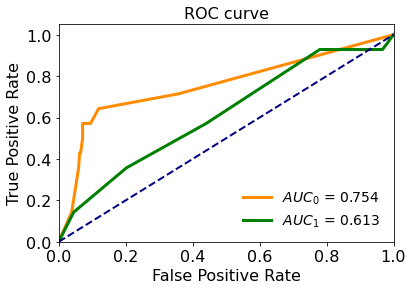

In [52]:
#KNN
clf = KNeighborsClassifier(n_neighbors=5, weights='uniform', metric='minkowski')
clf.fit(X_res, y_res)

y_pred = clf.predict(X_test)

print('Accuracy %s' % accuracy_score(y_test, y_pred))
print('F1-score %s' % f1_score(y_test, y_pred, average=None))
print(classification_report(y_test, y_pred))

y_score = clf.predict_proba(X_test)
fpr, tpr, _ = roc_curve(y_test, y_score[:, 1])
roc_auc = auc(fpr, tpr)

plt.plot(fpr0, tpr0, color='darkorange', lw=3, label='$AUC_0$ = %.3f' % (roc_auc0))
plt.plot(fpr, tpr, color='green', lw=3, label='$AUC_1$ = %.3f' % (roc_auc))

plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate', fontsize=16)
plt.ylabel('True Positive Rate', fontsize=16)
plt.title('ROC curve', fontsize=16)
plt.legend(loc="lower right", fontsize=14, frameon=False)
plt.tick_params(axis='both', which='major', labelsize=16)
plt.show()

Condensed Nearest Neighbors

In [53]:
import warnings
warnings.simplefilter("ignore")

In [54]:
cnn = CondensedNearestNeighbour(random_state=42, n_jobs=10)   #n_jobs numero di processori da utilizzare 
X_res, y_res = cnn.fit_resample(X_train, y_train['emotional_intensity'])
print('Resampled dataset shape %s' % Counter(y_res))

Resampled dataset shape Counter({0: 149, 1: 41})


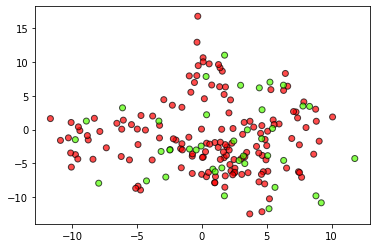

In [55]:
pca = PCA(n_components=2)
pca.fit(X_train)
X_pca = pca.transform(X_res)

plt.scatter(X_pca[:, 0], X_pca[:, 1], c=y_res, cmap=plt.cm.prism, edgecolor='k', alpha=0.7)
plt.show()

In [ ]:
"""check_params ={"criterion":["gini", "entropy"],
         "max_depth":[4, 6, 8, 10],
         "min_samples_split": [5, 10, 15, 20],
         "min_samples_leaf": [3, 5, 7, 9, 11]}

dt=DecisionTreeClassifier()
          
results = customGridSearch(X_res, y_res, dt, check_params, "f1_macro")"""

____________________________________________ START GRID SEARCH ____________________________________________
------- Score = f1_macro------- 

> Fold = RepeatedStratifiedKFold(n_repeats=10, n_splits=5, random_state=None)

> Best Parameter set: 

{'criterion': 'gini', 'max_depth': 8, 'min_samples_leaf': 3, 'min_samples_split': 15}

> Grid scores:

...........RESULTS FOR TRAINING.........
........................................
0.835 (+/-0.095) for {'criterion': 'gini', 'max_depth': 4, 'min_samples_leaf': 3, 'min_samples_split': 5}
0.833 (+/-0.094) for {'criterion': 'gini', 'max_depth': 4, 'min_samples_leaf': 3, 'min_samples_split': 10}
0.815 (+/-0.095) for {'criterion': 'gini', 'max_depth': 4, 'min_samples_leaf': 3, 'min_samples_split': 15}
0.798 (+/-0.085) for {'criterion': 'gini', 'max_depth': 4, 'min_samples_leaf': 3, 'min_samples_split': 20}
0.828 (+/-0.075) for {'criterion': 'gini', 'max_depth': 4, 'min_samples_leaf': 5, 'min_samples_split': 5}
0.828 (+/-0.074) for {'criterion': 'g

In [ ]:
#results

{'f1_macro': {'criterion': 'gini',
  'max_depth': 8,
  'min_samples_leaf': 3,
  'min_samples_split': 15}}

Accuracy 0.9
F1-score [0.94704992 0.1025641 ]
              precision    recall  f1-score   support

           0       0.96      0.93      0.95       336
           1       0.08      0.14      0.10        14

    accuracy                           0.90       350
   macro avg       0.52      0.54      0.52       350
weighted avg       0.93      0.90      0.91       350



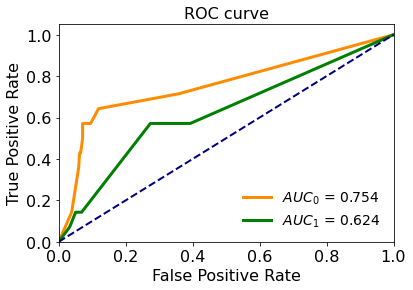

In [56]:
clf = DecisionTreeClassifier(criterion = 'gini', max_depth = 8, min_samples_leaf = 3, min_samples_split = 15, random_state=42)
clf.fit(X_res, y_res)

y_pred = clf.predict(X_test)

print('Accuracy %s' % accuracy_score(y_test, y_pred))
print('F1-score %s' % f1_score(y_test, y_pred, average=None))
print(classification_report(y_test, y_pred))

y_score = clf.predict_proba(X_test)
fpr, tpr, _ = roc_curve(y_test, y_score[:, 1])
roc_auc = auc(fpr, tpr)

plt.plot(fpr0, tpr0, color='darkorange', lw=3, label='$AUC_0$ = %.3f' % (roc_auc0))
plt.plot(fpr, tpr, color='green', lw=3, label='$AUC_1$ = %.3f' % (roc_auc))

plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate', fontsize=16)
plt.ylabel('True Positive Rate', fontsize=16)
plt.title('ROC curve', fontsize=16)
plt.legend(loc="lower right", fontsize=14, frameon=False)
plt.tick_params(axis='both', which='major', labelsize=16)
plt.show()

In [ ]:
"""check_params = {'n_neighbors': [1, 5, 10, 15, 20], "weights":["distance", "uniform"], 'metric' :['minkowski', 'manhattan', 'euclidean']}

clf=KNeighborsClassifier()
          
results = customGridSearch(X_res, y_res, clf, check_params, "f1_macro")"""

____________________________________________ START GRID SEARCH ____________________________________________
------- Score = f1_macro------- 

> Fold = RepeatedStratifiedKFold(n_repeats=10, n_splits=5, random_state=None)

> Best Parameter set: 

{'metric': 'minkowski', 'n_neighbors': 5, 'weights': 'distance'}

> Grid scores:

...........RESULTS FOR TRAINING.........
........................................
1.000 (+/-0.000) for {'metric': 'minkowski', 'n_neighbors': 1, 'weights': 'distance'}
1.000 (+/-0.000) for {'metric': 'minkowski', 'n_neighbors': 1, 'weights': 'uniform'}
1.000 (+/-0.000) for {'metric': 'minkowski', 'n_neighbors': 5, 'weights': 'distance'}
0.540 (+/-0.083) for {'metric': 'minkowski', 'n_neighbors': 5, 'weights': 'uniform'}
1.000 (+/-0.000) for {'metric': 'minkowski', 'n_neighbors': 10, 'weights': 'distance'}
0.446 (+/-0.025) for {'metric': 'minkowski', 'n_neighbors': 10, 'weights': 'uniform'}
1.000 (+/-0.000) for {'metric': 'minkowski', 'n_neighbors': 15, 'weights': '

In [ ]:
#results

{'f1_macro': {'metric': 'minkowski', 'n_neighbors': 5, 'weights': 'distance'}}

Accuracy 0.9542857142857143
F1-score [0.97660819 0.        ]
              precision    recall  f1-score   support

           0       0.96      0.99      0.98       336
           1       0.00      0.00      0.00        14

    accuracy                           0.95       350
   macro avg       0.48      0.50      0.49       350
weighted avg       0.92      0.95      0.94       350



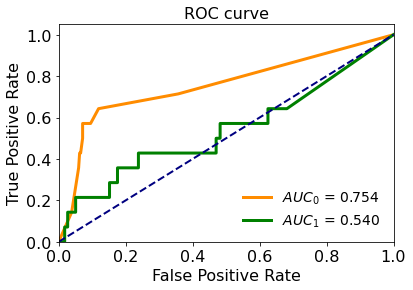

In [57]:
#KNN
clf = KNeighborsClassifier(n_neighbors=5, weights='distance', metric='minkowski')
clf.fit(X_res, y_res)

y_pred = clf.predict(X_test)

print('Accuracy %s' % accuracy_score(y_test, y_pred))
print('F1-score %s' % f1_score(y_test, y_pred, average=None))
print(classification_report(y_test, y_pred))

y_score = clf.predict_proba(X_test)
fpr, tpr, _ = roc_curve(y_test, y_score[:, 1])
roc_auc = auc(fpr, tpr)

plt.plot(fpr0, tpr0, color='darkorange', lw=3, label='$AUC_0$ = %.3f' % (roc_auc0))
plt.plot(fpr, tpr, color='green', lw=3, label='$AUC_1$ = %.3f' % (roc_auc))

plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate', fontsize=16)
plt.ylabel('True Positive Rate', fontsize=16)
plt.title('ROC curve', fontsize=16)
plt.legend(loc="lower right", fontsize=14, frameon=False)
plt.tick_params(axis='both', which='major', labelsize=16)
plt.show()

Tomek Links


In [58]:
tl = TomekLinks()
X_res, y_res = tl.fit_resample(X_train, y_train['emotional_intensity'])
print('Resampled dataset shape %s' % Counter(y_res))

Resampled dataset shape Counter({0: 979, 1: 41})


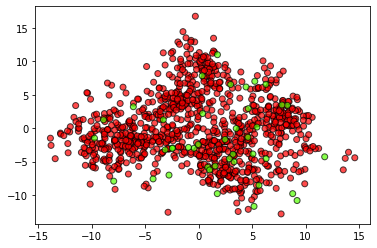

In [59]:
pca = PCA(n_components=2)
pca.fit(X_train)
X_pca = pca.transform(X_res)

plt.scatter(X_pca[:, 0], X_pca[:, 1], c=y_res, cmap=plt.cm.prism, edgecolor='k', alpha=0.7)
plt.show()

In [ ]:
"""check_params ={"criterion":["gini", "entropy"],
         "max_depth":[4, 6, 8, 10],
         "min_samples_split": [5, 10, 15, 20],
         "min_samples_leaf": [3, 5, 7, 9, 11]}

dt=DecisionTreeClassifier()
          
results = customGridSearch(X_res, y_res, dt, check_params, "f1_macro")"""

____________________________________________ START GRID SEARCH ____________________________________________
------- Score = f1_macro------- 

> Fold = RepeatedStratifiedKFold(n_repeats=10, n_splits=5, random_state=None)

> Best Parameter set: 

{'criterion': 'entropy', 'max_depth': 6, 'min_samples_leaf': 7, 'min_samples_split': 10}

> Grid scores:

...........RESULTS FOR TRAINING.........
........................................
0.758 (+/-0.064) for {'criterion': 'gini', 'max_depth': 4, 'min_samples_leaf': 3, 'min_samples_split': 5}
0.723 (+/-0.094) for {'criterion': 'gini', 'max_depth': 4, 'min_samples_leaf': 3, 'min_samples_split': 10}
0.689 (+/-0.114) for {'criterion': 'gini', 'max_depth': 4, 'min_samples_leaf': 3, 'min_samples_split': 15}
0.657 (+/-0.119) for {'criterion': 'gini', 'max_depth': 4, 'min_samples_leaf': 3, 'min_samples_split': 20}
0.701 (+/-0.094) for {'criterion': 'gini', 'max_depth': 4, 'min_samples_leaf': 5, 'min_samples_split': 5}
0.700 (+/-0.091) for {'criterion':

In [ ]:
#results

{'f1_macro': {'criterion': 'entropy',
  'max_depth': 6,
  'min_samples_leaf': 7,
  'min_samples_split': 10}}

Accuracy 0.9142857142857143
F1-score [0.95440729 0.28571429]
              precision    recall  f1-score   support

           0       0.98      0.93      0.95       336
           1       0.21      0.43      0.29        14

    accuracy                           0.91       350
   macro avg       0.59      0.68      0.62       350
weighted avg       0.94      0.91      0.93       350



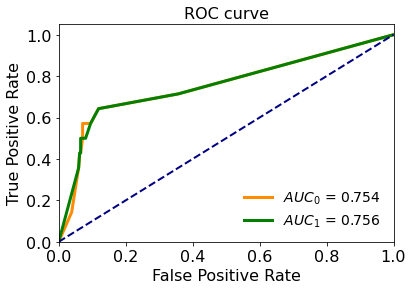

In [60]:
clf = DecisionTreeClassifier(criterion = 'entropy',max_depth = 6, min_samples_leaf= 7, min_samples_split = 10, random_state=42)
clf.fit(X_res, y_res)

y_pred = clf.predict(X_test)

print('Accuracy %s' % accuracy_score(y_test, y_pred))
print('F1-score %s' % f1_score(y_test, y_pred, average=None))
print(classification_report(y_test, y_pred))

y_score = clf.predict_proba(X_test)
fpr, tpr, _ = roc_curve(y_test, y_score[:, 1])
roc_auc = auc(fpr, tpr)

plt.plot(fpr0, tpr0, color='darkorange', lw=3, label='$AUC_0$ = %.3f' % (roc_auc0))
plt.plot(fpr, tpr, color='green', lw=3, label='$AUC_1$ = %.3f' % (roc_auc))

plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate', fontsize=16)
plt.ylabel('True Positive Rate', fontsize=16)
plt.title('ROC curve', fontsize=16)
plt.legend(loc="lower right", fontsize=14, frameon=False)
plt.tick_params(axis='both', which='major', labelsize=16)
plt.show()

In [ ]:
"""check_params = {'n_neighbors': [1, 5, 10, 15, 20], "weights":["distance", "uniform"], 'metric' :['minkowski', 'manhattan', 'euclidean']}

clf=KNeighborsClassifier()
          
results = customGridSearch(X_res, y_res, clf, check_params, "f1_macro")"""


____________________________________________ START GRID SEARCH ____________________________________________
------- Score = f1_macro------- 

> Fold = RepeatedStratifiedKFold(n_repeats=10, n_splits=5, random_state=None)

> Best Parameter set: 

{'metric': 'minkowski', 'n_neighbors': 1, 'weights': 'distance'}

> Grid scores:

...........RESULTS FOR TRAINING.........
........................................
1.000 (+/-0.000) for {'metric': 'minkowski', 'n_neighbors': 1, 'weights': 'distance'}
1.000 (+/-0.000) for {'metric': 'minkowski', 'n_neighbors': 1, 'weights': 'uniform'}
1.000 (+/-0.000) for {'metric': 'minkowski', 'n_neighbors': 5, 'weights': 'distance'}
0.490 (+/-0.008) for {'metric': 'minkowski', 'n_neighbors': 5, 'weights': 'uniform'}
1.000 (+/-0.000) for {'metric': 'minkowski', 'n_neighbors': 10, 'weights': 'distance'}
0.490 (+/-0.000) for {'metric': 'minkowski', 'n_neighbors': 10, 'weights': 'uniform'}
1.000 (+/-0.000) for {'metric': 'minkowski', 'n_neighbors': 15, 'weights': '

Accuracy 0.96
F1-score [0.97959184 0.        ]
              precision    recall  f1-score   support

           0       0.96      1.00      0.98       336
           1       0.00      0.00      0.00        14

    accuracy                           0.96       350
   macro avg       0.48      0.50      0.49       350
weighted avg       0.92      0.96      0.94       350



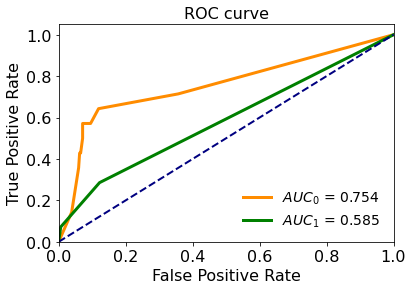

In [61]:
#KNN
clf = KNeighborsClassifier(n_neighbors=5, weights='uniform', metric='minkowski')
clf.fit(X_res, y_res)

y_pred = clf.predict(X_test)

print('Accuracy %s' % accuracy_score(y_test, y_pred))
print('F1-score %s' % f1_score(y_test, y_pred, average=None))
print(classification_report(y_test, y_pred))

y_score = clf.predict_proba(X_test)
fpr, tpr, _ = roc_curve(y_test, y_score[:, 1])
roc_auc = auc(fpr, tpr)

plt.plot(fpr0, tpr0, color='darkorange', lw=3, label='$AUC_0$ = %.3f' % (roc_auc0))
plt.plot(fpr, tpr, color='green', lw=3, label='$AUC_1$ = %.3f' % (roc_auc))

plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate', fontsize=16)
plt.ylabel('True Positive Rate', fontsize=16)
plt.title('ROC curve', fontsize=16)
plt.legend(loc="lower right", fontsize=14, frameon=False)
plt.tick_params(axis='both', which='major', labelsize=16)
plt.show()

Edit Nearest Neighbours

In [62]:
enn = EditedNearestNeighbours()
X_res, y_res = enn.fit_resample(X_train, y_train['emotional_intensity'])
print('Resampled dataset shape %s' % Counter(y_res))

Resampled dataset shape Counter({0: 935, 1: 41})


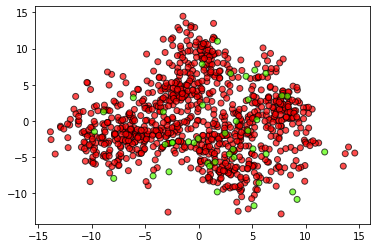

In [63]:
pca = PCA(n_components=2)
pca.fit(X_train)
X_pca = pca.transform(X_res)

plt.scatter(X_pca[:, 0], X_pca[:, 1], c=y_res, cmap=plt.cm.prism, edgecolor='k', alpha=0.7)
plt.show()

In [ ]:
"""check_params ={"criterion":["gini", "entropy"],
         "max_depth":[4, 6, 8, 10],
         "min_samples_split": [5, 10, 15, 20],
         "min_samples_leaf": [3, 5, 7, 9, 11]}

dt=DecisionTreeClassifier()
          
results = customGridSearch(X_res, y_res, dt, check_params, "f1_macro")"""

____________________________________________ START GRID SEARCH ____________________________________________
------- Score = f1_macro------- 

> Fold = RepeatedStratifiedKFold(n_repeats=10, n_splits=5, random_state=None)

> Best Parameter set: 

{'criterion': 'gini', 'max_depth': 10, 'min_samples_leaf': 3, 'min_samples_split': 5}

> Grid scores:

...........RESULTS FOR TRAINING.........
........................................
0.769 (+/-0.071) for {'criterion': 'gini', 'max_depth': 4, 'min_samples_leaf': 3, 'min_samples_split': 5}
0.741 (+/-0.098) for {'criterion': 'gini', 'max_depth': 4, 'min_samples_leaf': 3, 'min_samples_split': 10}
0.705 (+/-0.124) for {'criterion': 'gini', 'max_depth': 4, 'min_samples_leaf': 3, 'min_samples_split': 15}
0.681 (+/-0.138) for {'criterion': 'gini', 'max_depth': 4, 'min_samples_leaf': 3, 'min_samples_split': 20}
0.719 (+/-0.091) for {'criterion': 'gini', 'max_depth': 4, 'min_samples_leaf': 5, 'min_samples_split': 5}
0.719 (+/-0.091) for {'criterion': 'g

In [ ]:
#results

{'f1_macro': {'criterion': 'gini',
  'max_depth': 10,
  'min_samples_leaf': 3,
  'min_samples_split': 5}}

Accuracy 0.9142857142857143
F1-score [0.95481928 0.16666667]
              precision    recall  f1-score   support

           0       0.97      0.94      0.95       336
           1       0.14      0.21      0.17        14

    accuracy                           0.91       350
   macro avg       0.55      0.58      0.56       350
weighted avg       0.93      0.91      0.92       350



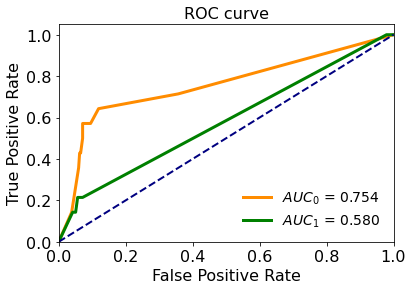

In [64]:
clf = DecisionTreeClassifier(criterion = 'gini', max_depth = 10, min_samples_leaf = 3, min_samples_split = 5, random_state=42)
clf.fit(X_res, y_res)

y_pred = clf.predict(X_test)

print('Accuracy %s' % accuracy_score(y_test, y_pred))
print('F1-score %s' % f1_score(y_test, y_pred, average=None))
print(classification_report(y_test, y_pred))

y_score = clf.predict_proba(X_test)
fpr, tpr, _ = roc_curve(y_test, y_score[:, 1])
roc_auc = auc(fpr, tpr)

plt.plot(fpr0, tpr0, color='darkorange', lw=3, label='$AUC_0$ = %.3f' % (roc_auc0))
plt.plot(fpr, tpr, color='green', lw=3, label='$AUC_1$ = %.3f' % (roc_auc))

plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate', fontsize=16)
plt.ylabel('True Positive Rate', fontsize=16)
plt.title('ROC curve', fontsize=16)
plt.legend(loc="lower right", fontsize=14, frameon=False)
plt.tick_params(axis='both', which='major', labelsize=16)
plt.show()

In [ ]:
"""check_params = {'n_neighbors': [1, 5, 10, 15, 20], "weights":["distance", "uniform"], 'metric' :['minkowski', 'manhattan', 'euclidean']}

clf=KNeighborsClassifier()
          
results = customGridSearch(X_res, y_res, clf, check_params, "f1_macro")"""

____________________________________________ START GRID SEARCH ____________________________________________
------- Score = f1_macro------- 

> Fold = RepeatedStratifiedKFold(n_repeats=10, n_splits=5, random_state=None)

> Best Parameter set: 

{'metric': 'minkowski', 'n_neighbors': 1, 'weights': 'distance'}

> Grid scores:

...........RESULTS FOR TRAINING.........
........................................
1.000 (+/-0.000) for {'metric': 'minkowski', 'n_neighbors': 1, 'weights': 'distance'}
1.000 (+/-0.000) for {'metric': 'minkowski', 'n_neighbors': 1, 'weights': 'uniform'}
1.000 (+/-0.000) for {'metric': 'minkowski', 'n_neighbors': 5, 'weights': 'distance'}
0.495 (+/-0.023) for {'metric': 'minkowski', 'n_neighbors': 5, 'weights': 'uniform'}
1.000 (+/-0.000) for {'metric': 'minkowski', 'n_neighbors': 10, 'weights': 'distance'}
0.489 (+/-0.000) for {'metric': 'minkowski', 'n_neighbors': 10, 'weights': 'uniform'}
1.000 (+/-0.000) for {'metric': 'minkowski', 'n_neighbors': 15, 'weights': '

Accuracy 0.96
F1-score [0.97959184 0.        ]
              precision    recall  f1-score   support

           0       0.96      1.00      0.98       336
           1       0.00      0.00      0.00        14

    accuracy                           0.96       350
   macro avg       0.48      0.50      0.49       350
weighted avg       0.92      0.96      0.94       350



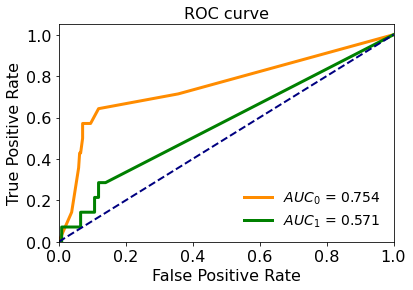

In [65]:
#KNN
clf = KNeighborsClassifier(n_neighbors=5, weights='distance', metric='minkowski')
clf.fit(X_res, y_res)

y_pred = clf.predict(X_test)

print('Accuracy %s' % accuracy_score(y_test, y_pred))
print('F1-score %s' % f1_score(y_test, y_pred, average=None))
print(classification_report(y_test, y_pred))

y_score = clf.predict_proba(X_test)
fpr, tpr, _ = roc_curve(y_test, y_score[:, 1])
roc_auc = auc(fpr, tpr)

plt.plot(fpr0, tpr0, color='darkorange', lw=3, label='$AUC_0$ = %.3f' % (roc_auc0))
plt.plot(fpr, tpr, color='green', lw=3, label='$AUC_1$ = %.3f' % (roc_auc))

plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate', fontsize=16)
plt.ylabel('True Positive Rate', fontsize=16)
plt.title('ROC curve', fontsize=16)
plt.legend(loc="lower right", fontsize=14, frameon=False)
plt.tick_params(axis='both', which='major', labelsize=16)
plt.show()

Cluster Centroids

In [66]:
from sklearn.cluster import KMeans
from imblearn.under_sampling import ClusterCentroids
#l'unico che usa il k-means

In [67]:
cc = ClusterCentroids(estimator=KMeans(n_init=1, random_state=0), random_state=42)
X_res, y_res = cc.fit_resample(X_train, y_train['emotional_intensity'])
print('Resampled dataset shape %s' % Counter(y_res))

Resampled dataset shape Counter({0: 41, 1: 41})


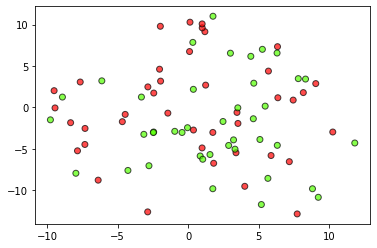

In [68]:
pca = PCA(n_components=2)
pca.fit(X_train)
X_pca = pca.transform(X_res)

plt.scatter(X_pca[:, 0], X_pca[:, 1], c=y_res, cmap=plt.cm.prism, edgecolor='k', alpha=0.7)
plt.show()

In [ ]:
"""check_params ={"criterion":["gini", "entropy"],
         "max_depth":[4, 6, 8, 10],
         "min_samples_split": [5, 10, 15, 20],
         "min_samples_leaf": [3, 5, 7, 9, 11]}

dt=DecisionTreeClassifier()
          
results = customGridSearch(X_res, y_res, dt, check_params, "f1_macro")"""

____________________________________________ START GRID SEARCH ____________________________________________
------- Score = f1_macro------- 

> Fold = RepeatedStratifiedKFold(n_repeats=10, n_splits=5, random_state=None)

> Best Parameter set: 

{'criterion': 'entropy', 'max_depth': 8, 'min_samples_leaf': 3, 'min_samples_split': 5}

> Grid scores:

...........RESULTS FOR TRAINING.........
........................................
0.960 (+/-0.039) for {'criterion': 'gini', 'max_depth': 4, 'min_samples_leaf': 3, 'min_samples_split': 5}
0.942 (+/-0.047) for {'criterion': 'gini', 'max_depth': 4, 'min_samples_leaf': 3, 'min_samples_split': 10}
0.919 (+/-0.051) for {'criterion': 'gini', 'max_depth': 4, 'min_samples_leaf': 3, 'min_samples_split': 15}
0.914 (+/-0.051) for {'criterion': 'gini', 'max_depth': 4, 'min_samples_leaf': 3, 'min_samples_split': 20}
0.915 (+/-0.048) for {'criterion': 'gini', 'max_depth': 4, 'min_samples_leaf': 5, 'min_samples_split': 5}
0.915 (+/-0.046) for {'criterion': 

In [ ]:
#results

{'f1_macro': {'criterion': 'entropy',
  'max_depth': 8,
  'min_samples_leaf': 3,
  'min_samples_split': 5}}

Accuracy 0.30857142857142855
F1-score [0.44495413 0.08333333]
              precision    recall  f1-score   support

           0       0.97      0.29      0.44       336
           1       0.04      0.79      0.08        14

    accuracy                           0.31       350
   macro avg       0.51      0.54      0.26       350
weighted avg       0.93      0.31      0.43       350



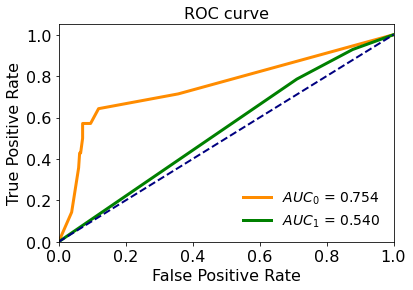

In [69]:
clf = DecisionTreeClassifier(criterion = 'entropy', max_depth = 8, min_samples_leaf = 3, min_samples_split = 5, random_state=42)
clf.fit(X_res, y_res)

y_pred = clf.predict(X_test)

print('Accuracy %s' % accuracy_score(y_test, y_pred))
print('F1-score %s' % f1_score(y_test, y_pred, average=None))
print(classification_report(y_test, y_pred))

y_score = clf.predict_proba(X_test)
fpr, tpr, _ = roc_curve(y_test, y_score[:, 1])
roc_auc = auc(fpr, tpr)

plt.plot(fpr0, tpr0, color='darkorange', lw=3, label='$AUC_0$ = %.3f' % (roc_auc0))
plt.plot(fpr, tpr, color='green', lw=3, label='$AUC_1$ = %.3f' % (roc_auc))

plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate', fontsize=16)
plt.ylabel('True Positive Rate', fontsize=16)
plt.title('ROC curve', fontsize=16)
plt.legend(loc="lower right", fontsize=14, frameon=False)
plt.tick_params(axis='both', which='major', labelsize=16)
plt.show()

In [ ]:
"""check_params = {'n_neighbors': [1, 5, 10, 15, 20], "weights":["distance", "uniform"], 'metric' :['minkowski', 'manhattan', 'euclidean']}

clf=KNeighborsClassifier()
          
results = customGridSearch(X_res, y_res, clf, check_params, "f1_macro")"""


____________________________________________ START GRID SEARCH ____________________________________________
------- Score = f1_macro------- 

> Fold = RepeatedStratifiedKFold(n_repeats=10, n_splits=5, random_state=None)

> Best Parameter set: 

{'metric': 'manhattan', 'n_neighbors': 10, 'weights': 'distance'}

> Grid scores:

...........RESULTS FOR TRAINING.........
........................................
1.000 (+/-0.000) for {'metric': 'minkowski', 'n_neighbors': 1, 'weights': 'distance'}
1.000 (+/-0.000) for {'metric': 'minkowski', 'n_neighbors': 1, 'weights': 'uniform'}
1.000 (+/-0.000) for {'metric': 'minkowski', 'n_neighbors': 5, 'weights': 'distance'}
0.572 (+/-0.111) for {'metric': 'minkowski', 'n_neighbors': 5, 'weights': 'uniform'}
1.000 (+/-0.000) for {'metric': 'minkowski', 'n_neighbors': 10, 'weights': 'distance'}
0.432 (+/-0.092) for {'metric': 'minkowski', 'n_neighbors': 10, 'weights': 'uniform'}
1.000 (+/-0.000) for {'metric': 'minkowski', 'n_neighbors': 15, 'weights': 

Accuracy 0.9514285714285714
F1-score [0.97488922 0.26086957]
              precision    recall  f1-score   support

           0       0.97      0.98      0.97       336
           1       0.33      0.21      0.26        14

    accuracy                           0.95       350
   macro avg       0.65      0.60      0.62       350
weighted avg       0.94      0.95      0.95       350



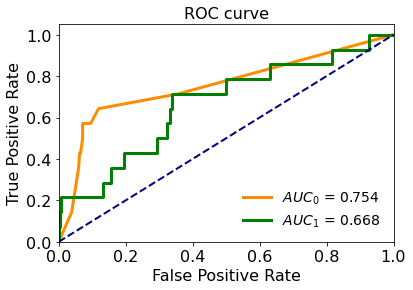

In [70]:
#KNN
clf = KNeighborsClassifier(n_neighbors=10, weights='distance', metric='manhattan')
clf.fit(X_res, y_res)

y_pred = clf.predict(X_test)

print('Accuracy %s' % accuracy_score(y_test, y_pred))
print('F1-score %s' % f1_score(y_test, y_pred, average=None))
print(classification_report(y_test, y_pred))

y_score = clf.predict_proba(X_test)
fpr, tpr, _ = roc_curve(y_test, y_score[:, 1])
roc_auc = auc(fpr, tpr)

plt.plot(fpr0, tpr0, color='darkorange', lw=3, label='$AUC_0$ = %.3f' % (roc_auc0))
plt.plot(fpr, tpr, color='green', lw=3, label='$AUC_1$ = %.3f' % (roc_auc))

plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate', fontsize=16)
plt.ylabel('True Positive Rate', fontsize=16)
plt.title('ROC curve', fontsize=16)
plt.legend(loc="lower right", fontsize=14, frameon=False)
plt.tick_params(axis='both', which='major', labelsize=16)
plt.show()

  OVERSAMPLING 

In [71]:
from imblearn.over_sampling import RandomOverSampler
from imblearn.over_sampling import SMOTE
from imblearn.over_sampling import ADASYN

RandomOverSampler

In [72]:
ros = RandomOverSampler(random_state=42)
X_res, y_res = ros.fit_resample(X_train, y_train['emotional_intensity'])
print('Resampled dataset shape %s' % Counter(y_res))

Resampled dataset shape Counter({0: 984, 1: 984})


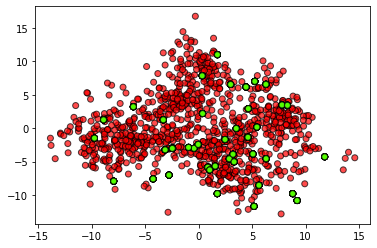

In [73]:
pca = PCA(n_components=2)
pca.fit(X_train)
X_pca = pca.transform(X_res)

plt.scatter(X_pca[:, 0], X_pca[:, 1], c=y_res, cmap=plt.cm.prism, edgecolor='k', alpha=0.7)
plt.show()

In [74]:
check_params ={"criterion":["gini", "entropy"],
         "max_depth":[4, 6, 8, 10],
         "min_samples_split": [5, 10, 15, 20],
         "min_samples_leaf": [3, 5, 7, 9, 11]}

dt=DecisionTreeClassifier()
          
results = customGridSearch(X_res, y_res, dt, check_params, "f1_macro")

____________________________________________ START GRID SEARCH ____________________________________________
------- Score = f1_macro------- 

> Fold = RepeatedStratifiedKFold(n_repeats=10, n_splits=5, random_state=None)

> Best Parameter set: 

{'criterion': 'gini', 'max_depth': 10, 'min_samples_leaf': 3, 'min_samples_split': 5}

> Grid scores:

...........RESULTS FOR TRAINING.........
........................................
0.894 (+/-0.028) for {'criterion': 'gini', 'max_depth': 4, 'min_samples_leaf': 3, 'min_samples_split': 5}
0.893 (+/-0.028) for {'criterion': 'gini', 'max_depth': 4, 'min_samples_leaf': 3, 'min_samples_split': 10}
0.893 (+/-0.028) for {'criterion': 'gini', 'max_depth': 4, 'min_samples_leaf': 3, 'min_samples_split': 15}
0.894 (+/-0.028) for {'criterion': 'gini', 'max_depth': 4, 'min_samples_leaf': 3, 'min_samples_split': 20}
0.892 (+/-0.029) for {'criterion': 'gini', 'max_depth': 4, 'min_samples_leaf': 5, 'min_samples_split': 5}
0.892 (+/-0.029) for {'criterion': 'g

In [75]:
results

{'f1_macro': {'criterion': 'gini',
  'max_depth': 10,
  'min_samples_leaf': 3,
  'min_samples_split': 5}}

Accuracy 0.9285714285714286
F1-score [0.96251874 0.24242424]
              precision    recall  f1-score   support

           0       0.97      0.96      0.96       336
           1       0.21      0.29      0.24        14

    accuracy                           0.93       350
   macro avg       0.59      0.62      0.60       350
weighted avg       0.94      0.93      0.93       350



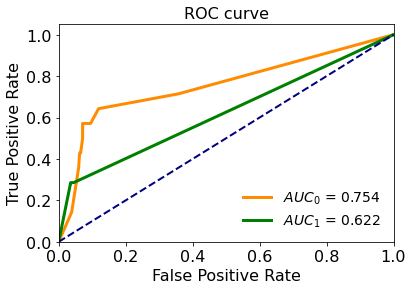

In [76]:
clf = DecisionTreeClassifier(criterion = 'gini', max_depth = 10, min_samples_leaf = 3, min_samples_split = 5, random_state=42)
clf.fit(X_res, y_res)

y_pred = clf.predict(X_test)

print('Accuracy %s' % accuracy_score(y_test, y_pred))
print('F1-score %s' % f1_score(y_test, y_pred, average=None))
print(classification_report(y_test, y_pred))

y_score = clf.predict_proba(X_test)
fpr, tpr, _ = roc_curve(y_test, y_score[:, 1])
roc_auc = auc(fpr, tpr)

plt.plot(fpr0, tpr0, color='darkorange', lw=3, label='$AUC_0$ = %.3f' % (roc_auc0))
plt.plot(fpr, tpr, color='green', lw=3, label='$AUC_1$ = %.3f' % (roc_auc))

plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate', fontsize=16)
plt.ylabel('True Positive Rate', fontsize=16)
plt.title('ROC curve', fontsize=16)
plt.legend(loc="lower right", fontsize=14, frameon=False)
plt.tick_params(axis='both', which='major', labelsize=16)
plt.show()

In [77]:
check_params = {'n_neighbors': [1, 5, 10, 15, 20], "weights":["distance", "uniform"], 'metric' :['minkowski', 'manhattan', 'euclidean']}

clf=KNeighborsClassifier()
          
results = customGridSearch(X_res, y_res, clf, check_params, "f1_macro")

____________________________________________ START GRID SEARCH ____________________________________________
------- Score = f1_macro------- 

> Fold = RepeatedStratifiedKFold(n_repeats=10, n_splits=5, random_state=None)

> Best Parameter set: 

{'metric': 'minkowski', 'n_neighbors': 1, 'weights': 'distance'}

> Grid scores:

...........RESULTS FOR TRAINING.........
........................................
1.000 (+/-0.000) for {'metric': 'minkowski', 'n_neighbors': 1, 'weights': 'distance'}
1.000 (+/-0.000) for {'metric': 'minkowski', 'n_neighbors': 1, 'weights': 'uniform'}
1.000 (+/-0.000) for {'metric': 'minkowski', 'n_neighbors': 5, 'weights': 'distance'}
0.980 (+/-0.004) for {'metric': 'minkowski', 'n_neighbors': 5, 'weights': 'uniform'}
1.000 (+/-0.000) for {'metric': 'minkowski', 'n_neighbors': 10, 'weights': 'distance'}
0.955 (+/-0.005) for {'metric': 'minkowski', 'n_neighbors': 10, 'weights': 'uniform'}
1.000 (+/-0.000) for {'metric': 'minkowski', 'n_neighbors': 15, 'weights': '

Accuracy 0.8857142857142857
F1-score [0.93920973 0.04761905]
              precision    recall  f1-score   support

           0       0.96      0.92      0.94       336
           1       0.04      0.07      0.05        14

    accuracy                           0.89       350
   macro avg       0.50      0.50      0.49       350
weighted avg       0.92      0.89      0.90       350



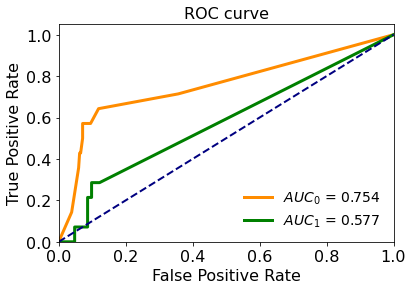

In [80]:
#KNN
clf = KNeighborsClassifier(n_neighbors=5, weights='distance', metric='minkowski')
clf.fit(X_res, y_res)

y_pred = clf.predict(X_test)

print('Accuracy %s' % accuracy_score(y_test, y_pred))
print('F1-score %s' % f1_score(y_test, y_pred, average=None))
print(classification_report(y_test, y_pred))

y_score = clf.predict_proba(X_test)
fpr, tpr, _ = roc_curve(y_test, y_score[:, 1])
roc_auc = auc(fpr, tpr)

plt.plot(fpr0, tpr0, color='darkorange', lw=3, label='$AUC_0$ = %.3f' % (roc_auc0))
plt.plot(fpr, tpr, color='green', lw=3, label='$AUC_1$ = %.3f' % (roc_auc))

plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate', fontsize=16)
plt.ylabel('True Positive Rate', fontsize=16)
plt.title('ROC curve', fontsize=16)
plt.legend(loc="lower right", fontsize=14, frameon=False)
plt.tick_params(axis='both', which='major', labelsize=16)
plt.show()

SMOTE


In [81]:
sm = SMOTE(random_state=42)
X_res, y_res = sm.fit_resample(X_train, y_train['emotional_intensity'])
print('Resampled dataset shape %s' % Counter(y_res))

Resampled dataset shape Counter({0: 984, 1: 984})


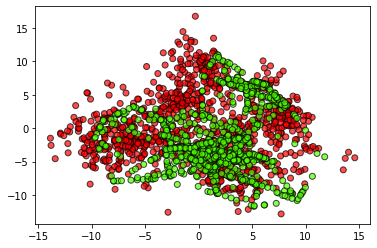

In [82]:
pca = PCA(n_components=2)
pca.fit(X_train)
X_pca = pca.transform(X_res)

plt.scatter(X_pca[:, 0], X_pca[:, 1], c=y_res, cmap=plt.cm.prism, edgecolor='k', alpha=0.7)
plt.show()

In [83]:
check_params ={"criterion":["gini", "entropy"],
         "max_depth":[4, 6, 8, 10],
         "min_samples_split": [5, 10, 15, 20],
         "min_samples_leaf": [3, 5, 7, 9, 11]}

dt=DecisionTreeClassifier()
          
results = customGridSearch(X_res, y_res, dt, check_params, "f1_macro")

____________________________________________ START GRID SEARCH ____________________________________________
------- Score = f1_macro------- 

> Fold = RepeatedStratifiedKFold(n_repeats=10, n_splits=5, random_state=None)

> Best Parameter set: 

{'criterion': 'entropy', 'max_depth': 10, 'min_samples_leaf': 3, 'min_samples_split': 5}

> Grid scores:

...........RESULTS FOR TRAINING.........
........................................
0.871 (+/-0.029) for {'criterion': 'gini', 'max_depth': 4, 'min_samples_leaf': 3, 'min_samples_split': 5}
0.870 (+/-0.031) for {'criterion': 'gini', 'max_depth': 4, 'min_samples_leaf': 3, 'min_samples_split': 10}
0.870 (+/-0.030) for {'criterion': 'gini', 'max_depth': 4, 'min_samples_leaf': 3, 'min_samples_split': 15}
0.870 (+/-0.032) for {'criterion': 'gini', 'max_depth': 4, 'min_samples_leaf': 3, 'min_samples_split': 20}
0.869 (+/-0.031) for {'criterion': 'gini', 'max_depth': 4, 'min_samples_leaf': 5, 'min_samples_split': 5}
0.870 (+/-0.031) for {'criterion':

In [84]:
results

{'f1_macro': {'criterion': 'entropy',
  'max_depth': 10,
  'min_samples_leaf': 3,
  'min_samples_split': 5}}

Accuracy 0.8057142857142857
F1-score [0.8913738  0.08108108]
              precision    recall  f1-score   support

           0       0.96      0.83      0.89       336
           1       0.05      0.21      0.08        14

    accuracy                           0.81       350
   macro avg       0.51      0.52      0.49       350
weighted avg       0.93      0.81      0.86       350



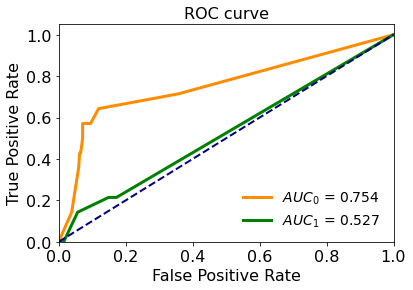

In [85]:
clf = DecisionTreeClassifier(criterion = 'entropy', max_depth = 10, min_samples_leaf = 3, min_samples_split = 5, random_state=42)
clf.fit(X_res, y_res)

y_pred = clf.predict(X_test)

print('Accuracy %s' % accuracy_score(y_test, y_pred))
print('F1-score %s' % f1_score(y_test, y_pred, average=None))
print(classification_report(y_test, y_pred))

y_score = clf.predict_proba(X_test)
fpr, tpr, _ = roc_curve(y_test, y_score[:, 1])
roc_auc = auc(fpr, tpr)

plt.plot(fpr0, tpr0, color='darkorange', lw=3, label='$AUC_0$ = %.3f' % (roc_auc0))
plt.plot(fpr, tpr, color='green', lw=3, label='$AUC_1$ = %.3f' % (roc_auc))

plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate', fontsize=16)
plt.ylabel('True Positive Rate', fontsize=16)
plt.title('ROC curve', fontsize=16)
plt.legend(loc="lower right", fontsize=14, frameon=False)
plt.tick_params(axis='both', which='major', labelsize=16)
plt.show()

In [86]:
check_params = {'n_neighbors': [1, 5, 10, 15, 20], "weights":["distance", "uniform"], 'metric' :['minkowski', 'manhattan', 'euclidean']}

clf=KNeighborsClassifier()
          
results = customGridSearch(X_res, y_res, clf, check_params, "f1_macro")

____________________________________________ START GRID SEARCH ____________________________________________
------- Score = f1_macro------- 

> Fold = RepeatedStratifiedKFold(n_repeats=10, n_splits=5, random_state=None)

> Best Parameter set: 

{'metric': 'manhattan', 'n_neighbors': 1, 'weights': 'distance'}

> Grid scores:

...........RESULTS FOR TRAINING.........
........................................
1.000 (+/-0.000) for {'metric': 'minkowski', 'n_neighbors': 1, 'weights': 'distance'}
1.000 (+/-0.000) for {'metric': 'minkowski', 'n_neighbors': 1, 'weights': 'uniform'}
1.000 (+/-0.000) for {'metric': 'minkowski', 'n_neighbors': 5, 'weights': 'distance'}
0.931 (+/-0.008) for {'metric': 'minkowski', 'n_neighbors': 5, 'weights': 'uniform'}
1.000 (+/-0.000) for {'metric': 'minkowski', 'n_neighbors': 10, 'weights': 'distance'}
0.899 (+/-0.009) for {'metric': 'minkowski', 'n_neighbors': 10, 'weights': 'uniform'}
1.000 (+/-0.000) for {'metric': 'minkowski', 'n_neighbors': 15, 'weights': '

Accuracy 0.7114285714285714
F1-score [0.82852292 0.09009009]
              precision    recall  f1-score   support

           0       0.96      0.73      0.83       336
           1       0.05      0.36      0.09        14

    accuracy                           0.71       350
   macro avg       0.51      0.54      0.46       350
weighted avg       0.93      0.71      0.80       350



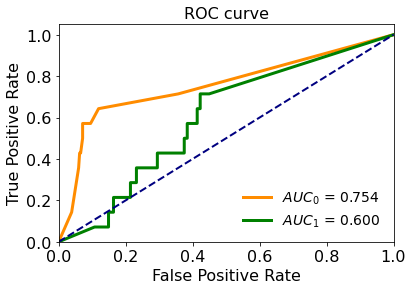

In [88]:
#KNN
clf = KNeighborsClassifier(n_neighbors=5, weights='distance', metric='manhattan')
clf.fit(X_res, y_res)

y_pred = clf.predict(X_test)

print('Accuracy %s' % accuracy_score(y_test, y_pred))
print('F1-score %s' % f1_score(y_test, y_pred, average=None))
print(classification_report(y_test, y_pred))

y_score = clf.predict_proba(X_test)
fpr, tpr, _ = roc_curve(y_test, y_score[:, 1])
roc_auc = auc(fpr, tpr)

plt.plot(fpr0, tpr0, color='darkorange', lw=3, label='$AUC_0$ = %.3f' % (roc_auc0))
plt.plot(fpr, tpr, color='green', lw=3, label='$AUC_1$ = %.3f' % (roc_auc))

plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate', fontsize=16)
plt.ylabel('True Positive Rate', fontsize=16)
plt.title('ROC curve', fontsize=16)
plt.legend(loc="lower right", fontsize=14, frameon=False)
plt.tick_params(axis='both', which='major', labelsize=16)
plt.show()

ADASYN

In [89]:
ada = ADASYN(random_state=42)
X_res, y_res = ada.fit_resample(X_train, y_train['emotional_intensity'])
print('Resampled dataset shape %s' % Counter(y_res))

Resampled dataset shape Counter({1: 985, 0: 984})


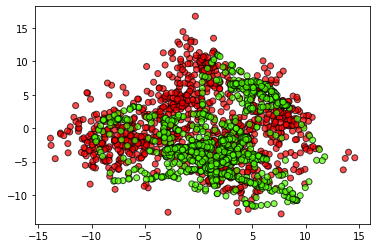

In [90]:
pca = PCA(n_components=2)
pca.fit(X_train)
X_pca = pca.transform(X_res)

plt.scatter(X_pca[:, 0], X_pca[:, 1], c=y_res, cmap=plt.cm.prism, edgecolor='k', alpha=0.7)
plt.show()

In [91]:
check_params ={"criterion":["gini", "entropy"],
         "max_depth":[4, 6, 8, 10],
         "min_samples_split": [5, 10, 15, 20],
         "min_samples_leaf": [3, 5, 7, 9, 11]}

dt=DecisionTreeClassifier()
          
results = customGridSearch(X_res, y_res, dt, check_params, "f1_macro")

____________________________________________ START GRID SEARCH ____________________________________________
------- Score = f1_macro------- 

> Fold = RepeatedStratifiedKFold(n_repeats=10, n_splits=5, random_state=None)

> Best Parameter set: 

{'criterion': 'entropy', 'max_depth': 10, 'min_samples_leaf': 3, 'min_samples_split': 5}

> Grid scores:

...........RESULTS FOR TRAINING.........
........................................
0.867 (+/-0.022) for {'criterion': 'gini', 'max_depth': 4, 'min_samples_leaf': 3, 'min_samples_split': 5}
0.866 (+/-0.022) for {'criterion': 'gini', 'max_depth': 4, 'min_samples_leaf': 3, 'min_samples_split': 10}
0.866 (+/-0.023) for {'criterion': 'gini', 'max_depth': 4, 'min_samples_leaf': 3, 'min_samples_split': 15}
0.866 (+/-0.023) for {'criterion': 'gini', 'max_depth': 4, 'min_samples_leaf': 3, 'min_samples_split': 20}
0.866 (+/-0.023) for {'criterion': 'gini', 'max_depth': 4, 'min_samples_leaf': 5, 'min_samples_split': 5}
0.865 (+/-0.023) for {'criterion':

In [92]:
results

{'f1_macro': {'criterion': 'entropy',
  'max_depth': 10,
  'min_samples_leaf': 3,
  'min_samples_split': 5}}

Accuracy 0.82
F1-score [0.89952153 0.1369863 ]
              precision    recall  f1-score   support

           0       0.97      0.84      0.90       336
           1       0.08      0.36      0.14        14

    accuracy                           0.82       350
   macro avg       0.53      0.60      0.52       350
weighted avg       0.93      0.82      0.87       350



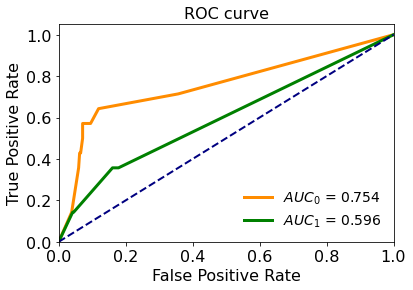

In [93]:
clf = DecisionTreeClassifier(criterion = 'entropy', max_depth = 10, min_samples_leaf = 3, min_samples_split = 5, random_state=42)
clf .fit(X_res, y_res)

y_pred = clf.predict(X_test)

print('Accuracy %s' % accuracy_score(y_test, y_pred))
print('F1-score %s' % f1_score(y_test, y_pred, average=None))
print(classification_report(y_test, y_pred))

y_score = clf.predict_proba(X_test)
fpr, tpr, _ = roc_curve(y_test, y_score[:, 1])
roc_auc = auc(fpr, tpr)

plt.plot(fpr0, tpr0, color='darkorange', lw=3, label='$AUC_0$ = %.3f' % (roc_auc0))
plt.plot(fpr, tpr, color='green', lw=3, label='$AUC_1$ = %.3f' % (roc_auc))

plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate', fontsize=16)
plt.ylabel('True Positive Rate', fontsize=16)
plt.title('ROC curve', fontsize=16)
plt.legend(loc="lower right", fontsize=14, frameon=False)
plt.tick_params(axis='both', which='major', labelsize=16)
plt.show()

In [94]:
check_params = {'n_neighbors': [1, 5, 10, 15, 20], "weights":["distance", "uniform"], 'metric' :['minkowski', 'manhattan', 'euclidean']}

clf=KNeighborsClassifier()
          
results = customGridSearch(X_res, y_res, clf, check_params, "f1_macro")

____________________________________________ START GRID SEARCH ____________________________________________
------- Score = f1_macro------- 

> Fold = RepeatedStratifiedKFold(n_repeats=10, n_splits=5, random_state=None)

> Best Parameter set: 

{'metric': 'manhattan', 'n_neighbors': 1, 'weights': 'distance'}

> Grid scores:

...........RESULTS FOR TRAINING.........
........................................
1.000 (+/-0.000) for {'metric': 'minkowski', 'n_neighbors': 1, 'weights': 'distance'}
1.000 (+/-0.000) for {'metric': 'minkowski', 'n_neighbors': 1, 'weights': 'uniform'}
1.000 (+/-0.000) for {'metric': 'minkowski', 'n_neighbors': 5, 'weights': 'distance'}
0.929 (+/-0.009) for {'metric': 'minkowski', 'n_neighbors': 5, 'weights': 'uniform'}
1.000 (+/-0.000) for {'metric': 'minkowski', 'n_neighbors': 10, 'weights': 'distance'}
0.900 (+/-0.010) for {'metric': 'minkowski', 'n_neighbors': 10, 'weights': 'uniform'}
1.000 (+/-0.000) for {'metric': 'minkowski', 'n_neighbors': 15, 'weights': '

Accuracy 0.7885714285714286
F1-score [0.88141026 0.02631579]
              precision    recall  f1-score   support

           0       0.95      0.82      0.88       336
           1       0.02      0.07      0.03        14

    accuracy                           0.79       350
   macro avg       0.49      0.44      0.45       350
weighted avg       0.92      0.79      0.85       350



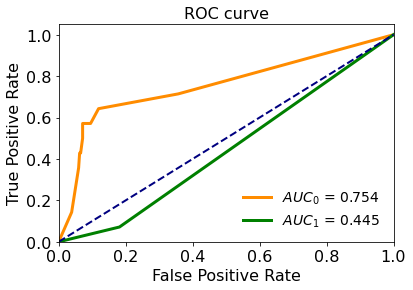

In [97]:
#KNN
clf = KNeighborsClassifier(n_neighbors=1, weights='distance', metric='manhattan')
clf.fit(X_res, y_res)

y_pred = clf.predict(X_test)

print('Accuracy %s' % accuracy_score(y_test, y_pred))
print('F1-score %s' % f1_score(y_test, y_pred, average=None))
print(classification_report(y_test, y_pred))

y_score = clf.predict_proba(X_test)
fpr, tpr, _ = roc_curve(y_test, y_score[:, 1])
roc_auc = auc(fpr, tpr)

plt.plot(fpr0, tpr0, color='darkorange', lw=3, label='$AUC_0$ = %.3f' % (roc_auc0))
plt.plot(fpr, tpr, color='green', lw=3, label='$AUC_1$ = %.3f' % (roc_auc))

plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate', fontsize=16)
plt.ylabel('True Positive Rate', fontsize=16)
plt.title('ROC curve', fontsize=16)
plt.legend(loc="lower right", fontsize=14, frameon=False)
plt.tick_params(axis='both', which='major', labelsize=16)
plt.show()

Balancing at the Algorithm Level

Class Weight - Decision Tree

Accuracy 0.9485714285714286
F1-score [0.97313433 0.4       ]
              precision    recall  f1-score   support

           0       0.98      0.97      0.97       336
           1       0.38      0.43      0.40        14

    accuracy                           0.95       350
   macro avg       0.68      0.70      0.69       350
weighted avg       0.95      0.95      0.95       350



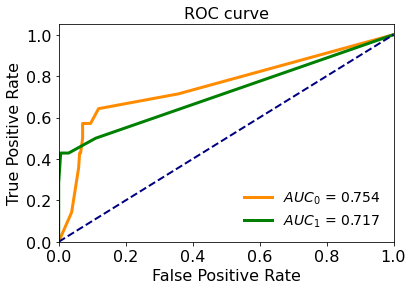

In [98]:
clf = DecisionTreeClassifier(min_samples_leaf=5, 
                             class_weight={0: 1, 1: 4}, random_state=42)
clf.fit(X_train, y_train)

y_pred = clf.predict(X_test)

print('Accuracy %s' % accuracy_score(y_test, y_pred))
print('F1-score %s' % f1_score(y_test, y_pred, average=None))
print(classification_report(y_test, y_pred))

y_score = clf.predict_proba(X_test)
fpr, tpr, _ = roc_curve(y_test, y_score[:, 1])
roc_auc = auc(fpr, tpr)

plt.plot(fpr0, tpr0, color='darkorange', lw=3, label='$AUC_0$ = %.3f' % (roc_auc0))
plt.plot(fpr, tpr, color='green', lw=3, label='$AUC_1$ = %.3f' % (roc_auc))

plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate', fontsize=16)
plt.ylabel('True Positive Rate', fontsize=16)
plt.title('ROC curve', fontsize=16)
plt.legend(loc="lower right", fontsize=14, frameon=False)
plt.tick_params(axis='both', which='major', labelsize=16)
plt.show()